In [ ]:
# !conda install -c conda-forge librosa --yes

In [ ]:
# !pip install pandas

  Using cached pandas-1.5.3-cp310-cp310-macosx_10_9_x86_64.whl (12.0 MB)
  Using cached pytz-2022.7.1-py2.py3-none-any.whl (499 kB)


In [ ]:
# !zip -r /content/file.zip /content/danceable_tracks/

In [ ]:
# from google.colab import files
# files.download("/content/file.zip")

In [ ]:
import os
import requests
import torch
import torchaudio
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# def plot_waveform(waveform, sample_rate, title="Waveform", xlim=None, ylim=None, save_path=None):
#   waveform = waveform.numpy()

#   num_channels, num_frames = waveform.shape
#   time_axis = torch.arange(0, num_frames) / sample_rate

#   figure, axes = plt.subplots(num_channels, 1)
#   if num_channels == 1:
#     axes = [axes]
#   for c in range(num_channels):
#     axes[c].plot(time_axis, waveform[c], linewidth=1)
#     axes[c].grid(True)
#     if num_channels > 1:
#       axes[c].set_ylabel(f'Channel {c+1}')
#     if xlim:
#       axes[c].set_xlim(xlim)
#     if ylim:
#       axes[c].set_ylim(ylim)
#   figure.suptitle(title)
#   # plt.show(block=False)
#   if save_path:
#     plt.savefig(save_path)
#   else:
#     plt.show()


# def plot_specgram(waveform, sample_rate, title="Spectrogram", xlim=None, save_path=None):
#   waveform = waveform.numpy()

#   num_channels, num_frames = waveform.shape
#   time_axis = torch.arange(0, num_frames) / sample_rate

#   figure, axes = plt.subplots(num_channels, 1)
#   if num_channels == 1:
#     axes = [axes]
#   for c in range(num_channels):
#     axes[c].specgram(waveform[c], Fs=sample_rate)
#     if num_channels > 1:
#       axes[c].set_ylabel(f'Channel {c+1}')
#     if xlim:
#       axes[c].set_xlim(xlim)
#   figure.suptitle(title)
#   # plt.show(block=False)
#   if save_path:
#       plt.savefig(save_path)
#   else:
#       plt.show()

In [ ]:
csv_file = "tracks_features.csv"
all_tracks = pd.read_csv(csv_file)

In [ ]:
if all_tracks['id'].isna().any():
    print("There are NaN values in the 'column_name' column")

In [ ]:
if all_tracks['preview_url'].isna().any():
    print("There are NaN values in the 'column_name' column")

In [ ]:
print(len(all_tracks))

21325


In [ ]:
# Replace this with the name of your DataFrame
csv_file = "tracks_features.csv"
all_tracks = pd.read_csv(csv_file)

# Create a folder with the same name as the DataFrame
folder_name = "tracks_features"
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# folder_name_sg = "all_tracks_sg"
# if not os.path.exists(folder_name_sg):
#     os.makedirs(folder_name_sg)

folder_name_audio = "tracks_features_audio"
if not os.path.exists(folder_name_audio):
    os.makedirs(folder_name_audio)

# folder_name_wf = "all_tracks_wf"
# if not os.path.exists(folder_name_wf):
#     os.makedirs(folder_name_wf)

# Iterate through the DataFrame
for index, row in all_tracks.iterrows():
    track_id = row['id']
    preview_url = row['preview_url']

    # Download the preview audio
    response = requests.get(preview_url)

    # Save the audio file temporarily
    with open(f"{folder_name_audio}/{track_id}_audio.mp3", "wb") as file:
        file.write(response.content)

    # Load the audio file using torchaudio
    # waveform, sample_rate = torchaudio.load(f"{track_id}_audio.mp3")

    # # Generate a spectrogram
    # specgram = torchaudio.transforms.Spectrogram()(waveform)

    # # Convert the spectrogram to dB scale
    # specgram_db = torchaudio.transforms.AmplitudeToDB()(specgram)

    # # Plot the spectrogram and save it as an image
    # plt.figure(figsize=(10, 4))
    # plt.imshow(specgram_db.log2()[0, :, :].numpy(), cmap='gray', aspect='auto', origin='lower')
    # plt.colorbar(format='%+2.0f dB')
    # plt.title(f'Spectrogram for track_id {track_id}')
    # plt.savefig(f"{folder_name}/{track_id}.png")
    # plt.close()

    # filename_wf = (f"{folder_name_wf}/{track_id}.png")
    # filename_sg = (f"{folder_name_audio}/{track_id}.png")

    # print_stats(waveform, sample_rate=sample_rate)
    # plot_waveform(waveform, sample_rate, save_path=filename_wf)
    # plot_specgram(waveform, sample_rate, save_path=filename_sg)
    # play_audio(waveform, sample_rate)

    # Delete the temporary audio file
    # os.remove(f"{track_id}.mp3")

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)


Mounted at /content/drive


In [ ]:
import shutil

# Replace <COLAB_SOURCE_PATH> with the path to the directory you want to copy in Colab
colab_source_path = "/content/tracks_features_audio"

# Replace <DRIVE_DESTINATION_PATH> with the desired destination path in your Drive
drive_destination_path = "/content/drive/MyDrive/tracks_features_audio"

# Copy the directory from Colab to Google Drive
shutil.copytree(colab_source_path, drive_destination_path)

'/content/drive/MyDrive/tracks_features_audio'

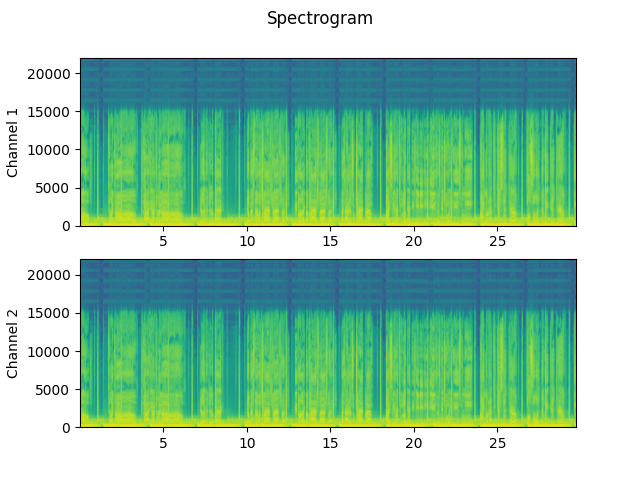

In [ ]:
# from PIL import Image

# # Replace <PATH_TO_IMAGE> with the path to your PNG image in your Drive folder
# image_path = "/content/all_tracks_sg/02rdXe0KhMe8p6ZHzYtuw0.png"

# # Open the image using the PIL library
# image = Image.open(image_path)

# # Display the image in Colab
# image.show()


In [ ]:
import os
import glob

# Replace <FOLDER_PATH> with the path to your folder in your Drive
folder_path = "/content/tracks_features_audio"

# Count the number of PNG files in the folder
png_count = len(glob.glob(os.path.join(folder_path, "*.mp3")))

print("Number of PNG files in the folder:", png_count)


Number of PNG files in the folder: 20053


In [ ]:
all_tracks.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,preview_url,track_name
0,0.571,0.544,6,-10.613,1,0.0299,0.453,0.008050,0.3220,0.216,132.052,audio_features,1xK59OXxi2TAAAbmZK0kBL,spotify:track:1xK59OXxi2TAAAbmZK0kBL,https://api.spotify.com/v1/tracks/1xK59OXxi2TA...,https://api.spotify.com/v1/audio-analysis/1xK5...,132631,4,https://p.scdn.co/mp3-preview/8cae6a028eeb1f19...,Romantic Homicide
1,0.778,0.632,2,-5.600,0,0.0493,0.274,0.000000,0.0915,0.498,122.104,audio_features,4nrPB8O7Y7wsOCJdgXkthe,spotify:track:4nrPB8O7Y7wsOCJdgXkthe,https://api.spotify.com/v1/tracks/4nrPB8O7Y7ws...,https://api.spotify.com/v1/audio-analysis/4nrP...,218289,4,https://p.scdn.co/mp3-preview/64e90f49942deb7d...,"Shakira: Bzrp Music Sessions, Vol. 53"
2,0.645,0.534,6,-10.800,0,0.0479,0.157,0.000000,0.0863,0.463,105.020,audio_features,3azJifCSqg9fRij2yKIbWz,spotify:track:3azJifCSqg9fRij2yKIbWz,https://api.spotify.com/v1/tracks/3azJifCSqg9f...,https://api.spotify.com/v1/audio-analysis/3azJ...,226467,4,https://p.scdn.co/mp3-preview/1d7c627bf5493281...,The Color Violet
3,0.574,0.469,4,-8.209,1,0.0254,0.534,0.000092,0.1280,0.288,132.023,audio_features,78Sw5GDo6AlGwTwanjXbGh,spotify:track:78Sw5GDo6AlGwTwanjXbGh,https://api.spotify.com/v1/tracks/78Sw5GDo6AlG...,https://api.spotify.com/v1/audio-analysis/78Sw...,242485,4,https://p.scdn.co/mp3-preview/c897e13337a42e5e...,Here With Me
4,0.551,0.550,10,-5.339,1,0.0286,0.777,0.000000,0.2020,0.342,101.190,audio_features,1Y3LN4zO1Edc2EluIoSPJN,spotify:track:1Y3LN4zO1Edc2EluIoSPJN,https://api.spotify.com/v1/tracks/1Y3LN4zO1Edc...,https://api.spotify.com/v1/audio-analysis/1Y3L...,176440,3,https://p.scdn.co/mp3-preview/b3a1f2337811888f...,Until I Found You (with Em Beihold) - Em Beiho...


In [ ]:
# all_tracks = pd.read_csv('all_tracks-1.csv')
# all_tracks.head()

,track_id,track_name,track_artist,danceability,instrumentalness,speechiness,acousticness,energy,valence,tempo,loudness,liveness,key,mode,time_signature,preview_url
0,6HJiKaPc4LYPczBFGSMBFs,I Got Summer On My Mind,Jay Dunham,0.807,0.527000,0.0631,0.00148,0.835,0.349,124.979,-6.849,0.2330,9,0,4,https://p.scdn.co/mp3-preview/69ee7f18663f3fad...
1,378GxC9FFbFaw02SyyxHfO,Serve a Boat,Shoreline Mafia,0.663,0.000000,0.2260,0.03120,0.636,0.433,159.999,-6.072,0.5150,10,0,4,https://p.scdn.co/mp3-preview/27961228bd5786d2...
2,5OKuigqDZttO0FSkKVF3tB,Fruit Punch,Jay Faded,0.680,0.021800,0.0806,0.18200,0.488,0.289,127.027,-9.400,0.2000,9,1,4,https://p.scdn.co/mp3-preview/805c3b2503faa715...
3,1Ks2UH3WvpohH9q8b03NM7,Skank N Flex (with Scrufizzer),Wax Motif,0.969,0.005930,0.1230,0.00416,0.870,0.567,130.054,-4.805,0.0789,9,1,4,https://p.scdn.co/mp3-preview/3ea6dda0cf4aa3f7...
4,2dy2C0StZ3yiEeb0Aoolcn,Bang Bang,Rita Ora,0.764,0.000263,0.0636,0.15900,0.846,0.777,122.992,-2.743,0.0475,10,0,4,https://p.scdn.co/mp3-preview/ec4790fb839ecd26...


In [ ]:
# track_id = '7zwn1eykZtZ5LODrf7c0tS'

# # Use boolean indexing to select the row(s) that match the track_id
# matching_rows = all_tracks[all_tracks['track_id'] == track_id]

# print("Matching row(s):\n", matching_rows)

Matching row(s):
                   track_id          track_name       track_artist  \
62  7zwn1eykZtZ5LODrf7c0tS  You Get Me So High  The Neighbourhood   

    danceability  instrumentalness  speechiness  acousticness  energy  \
62         0.551            0.0791       0.0542         0.186   0.881   

    valence   tempo  loudness  liveness  key  mode  time_signature  \
62    0.387  88.036    -6.099     0.152    7     0               4   

                                          preview_url  
62  https://p.scdn.co/mp3-preview/3f5a7c8b8e434e72...  


In [ ]:
# all_tracks = all_tracks.iloc[371:]

In [ ]:
# all_tracks.head()

,track_id,track_name,track_artist,danceability,instrumentalness,speechiness,acousticness,energy,valence,tempo,loudness,liveness,key,mode,time_signature,preview_url
371,1nTvSHpuWOKjSAOaqULVnB,The Riddle - Radio Edit Mix,Prezioso,0.835,0.000452,0.0476,0.0819,0.8080,0.182,128.002,-4.658,0.1640,6,0,4,https://p.scdn.co/mp3-preview/c21195855d6c84d5...
372,0Cqzr5QGrgY2iygBLr8uAp,Stereo Love - Extended Version,Edward Maya,0.777,0.014900,0.0396,0.0303,0.7820,0.330,127.044,-5.554,0.0957,1,0,4,https://p.scdn.co/mp3-preview/27052fe20b29de30...
373,50rEnYI8rLYgkzkpvqn240,Higher Calling,l'Outlander,0.591,0.958000,0.0329,0.9750,0.0623,0.454,80.001,-19.775,0.2680,1,0,4,https://p.scdn.co/mp3-preview/4749578f0c892b91...
374,4KykoaJQ5UxjCpp3lYkvTE,Liquor Store Blues (feat. Damian Marley),Bruno Mars,0.691,0.000000,0.0749,0.1130,0.8280,0.678,75.519,-3.909,0.3580,1,0,4,https://p.scdn.co/mp3-preview/34d5bdf562bea2fb...
375,3NRql0A1Ef4RCvT473iqgD,Hell N Back,Bakar,0.584,0.000091,0.5670,0.3120,0.6840,0.720,210.164,-4.314,0.1120,10,0,4,https://p.scdn.co/mp3-preview/4f2843e62fa79bc2...


In [ ]:
# Create a folder with the same name as the DataFrame
folder_name_sg = "all_tracks_sg"

# folder_name_wf = "all_tracks_wf"
# if not os.path.exists(folder_name_wf):
#     os.makedirs(folder_name_wf)

# Iterate through the DataFrame
for index, row in all_tracks.iterrows():
    track_id = row['track_id']
    preview_url = row['preview_url']

    # Download the preview audio
    response = requests.get(preview_url)

    # Save the audio file temporarily
    with open("temp_audio.mp3", "wb") as file:
        file.write(response.content)

    # Load the audio file using torchaudio
    waveform, sample_rate = torchaudio.load("temp_audio.mp3")

    # # Generate a spectrogram
    # specgram = torchaudio.transforms.Spectrogram()(waveform)

    # # Convert the spectrogram to dB scale
    # specgram_db = torchaudio.transforms.AmplitudeToDB()(specgram)

    # # Plot the spectrogram and save it as an image
    # plt.figure(figsize=(10, 4))
    # plt.imshow(specgram_db.log2()[0, :, :].numpy(), cmap='gray', aspect='auto', origin='lower')
    # plt.colorbar(format='%+2.0f dB')
    # plt.title(f'Spectrogram for track_id {track_id}')
    # plt.savefig(f"{folder_name}/{track_id}.png")
    # plt.close()

    # filename_wf = (f"{folder_name_wf}/{track_id}.png")
    filename_sg = (f"{folder_name_sg}/{track_id}.png")

    # print_stats(waveform, sample_rate=sample_rate)
    # plot_waveform(waveform, sample_rate, save_path=filename_wf)
    plot_specgram(waveform, sample_rate, save_path=filename_sg)
    # play_audio(waveform, sample_rate)

# Delete the temporary audio file
os.remove("temp_audio.mp3")

In [ ]:
# import zipfile
# import os

# # Replace <FOLDER_PATH> with the path to your folder in your Drive
# folder_path = "/content/all_tracks_sg"

# # Replace <ZIP_FILE_NAME> with the desired name for the zip file
# zip_file_name = "all_tracks.zip"

# # Compress the folder into a zip file
# zipf = zipfile.ZipFile(zip_file_name, 'w', zipfile.ZIP_DEFLATED)
# for root, dirs, files in os.walk(folder_path):
#     for file in files:
#         zipf.write(os.path.join(root, file))
# zipf.close()

# # Download the zip file
# from google.colab import files
# files.download(zip_file_name)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# import os

# # Replace <FOLDER_PATH> with the path to your folder in your Drive
# folder_path = "/content/all_tracks_sg"

# # Get the total size of all PNG files in the folder
# total_size = 0
# for root, dirs, files in os.walk(folder_path):
#     for file in files:
#         if file.endswith('.png'):
#             file_path = os.path.join(root, file)
#             total_size += os.path.getsize(file_path)

# # Calculate the average file size in MB
# num_files = 709
# avg_size_mb = total_size / num_files / 1024 / 1024

# print("The approximate size of the folder is", round(avg_size_mb, 2), "MB.")


The approximate size of the folder is 0.23 MB.
